# Multiple-View Multiple People Campus

Dataset: https://cvlab.epfl.ch/cms/site/cvlab2/lang/en/data/pom

In [1]:
%matplotlib inline
import json; from pprint import pprint
Settings = json.load(open('settings.txt'))
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../')
from pak.datasets.EPFL_Campus import EPFL_Campus
from time import time

root = Settings['data_root']
print(root)

campus = EPFL_Campus(root)
_start = time()
X, Y, Calib = campus.get_frame(0)
_end = time()
print("elapsed", _end - _start)

/storage/DATA/pak
elapsed 0.011665821075439453


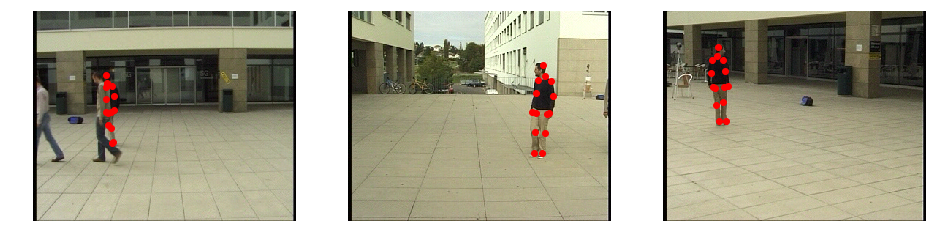

In [3]:
FRAME = 1700
X, Y, Calib = campus.get_frame(FRAME)

fig = plt.figure(figsize=(16,16))

COLORS = ['red', 'green', 'blue', 'yellow']

for cid in [0, 1, 2]:
    ax = fig.add_subplot(1, 3, cid+1)
    P = Calib[cid]
    im = X[cid]
    ax.imshow(im)
    ax.axis('off')
    
    for pid, person in enumerate(Y):
        pts = person
        if pts is None:
            continue
        
        for x, y, z in pts:
            pt3d = np.array([x,y,z,1])
            pt2d = P @ pt3d
            u = pt2d[0]/pt2d[2]
            v = pt2d[1]/pt2d[2]
            ax.scatter(u, v, color=COLORS[pid])
        

plt.show()